In [164]:
%pprint

Pretty printing has been turned ON


In [173]:
import numpy
import csv
import datetime as dt
import matplotlib.pyplot as plt
import collections as co
from operator import itemgetter
import os
import datetime as dt

In [138]:
# current working directory with csv file.
ls

README.md          incidents (1).csv  nancrime.ipynb


In [139]:
# collect crime records into dat from csv
dat = []
with open('incidents (1).csv', newline='') as csvfile:
    spamreader1 = csv.reader(csvfile, delimiter=',', quotechar='|')
    for i,row in enumerate(spamreader1):
        
        if i==0:
            ids = row
            
        else:  
            di = dict()
            for j,ID in enumerate(ids):
                
                if ID=='reportedtime':
                    Date = row[j].split(' ')
                    di['date'] = Date
                    continue
                di[ID] = row[j]
            dat.append(di)

In [155]:
# sample crime record
dat[0]

{'id': '4201201937861',
 'file': '2019-37861',
 'date': ['9/20/2019', '3:50:00', 'AM'],
 'occurrencetype': 'Commercial Break and Enter',
 'occurrencetypeid': '2120-01',
 'crimetype': 'Break and Enter',
 'crimetypeid': '1',
 'crimecategory': 'Property Crime',
 'crimecategoryid': '1',
 'location': '23XX DORMAN RD',
 'locationid': '39074',
 'neighbourhood': 'Northfield',
 'neighbourhoodid': '5',
 'lat': '49.196446',
 'long': '-123.985369'}

In [186]:
# 4422 crime records
len(dat)

4422

In [189]:
LAT = [float(crime['lat']) for crime in dat]
LONG = [float(crime['long']) for crime in dat] 
avg_lat = sum(LAT)/len(LAT)
avg_long = sum(LONG)/len(LONG)

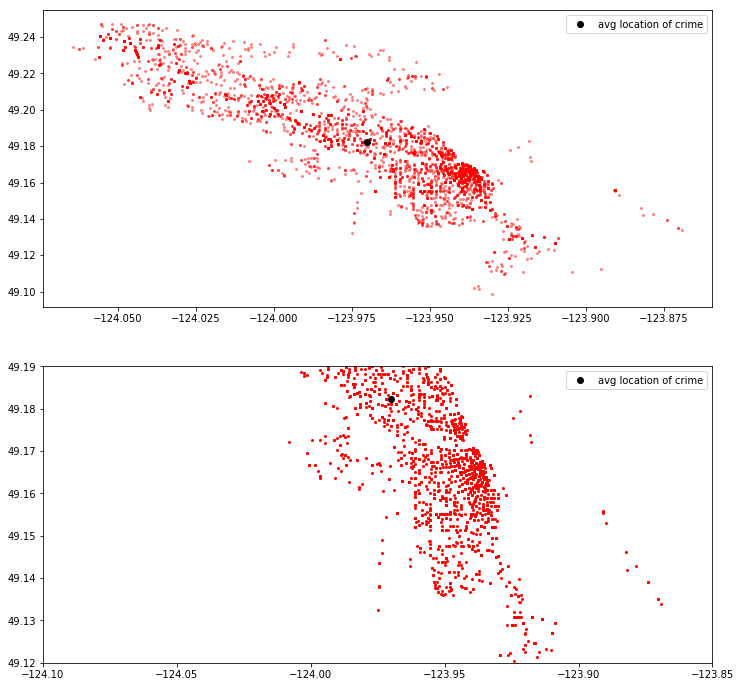

In [202]:
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.plot(LONG,LAT,'ro',markersize=2,alpha=0.4)
plt.plot(avg_long,avg_lat,'o',color='black',label='avg location of crime')
plt.legend()
# plt.ylim(49.12,49.19)
# plt.xlim(-123,975,-123,925)
plt.subplot(212)
plt.plot(LONG,LAT,'ro',markersize=2)
plt.plot(avg_long,avg_lat,'o',color='black',label='avg location of crime')
plt.ylim(49.12,49.19)
plt.xlim(-124.1,-123.85)
plt.legend()


In [142]:
neighbourhoods = set()
for crime in dat:
    neighbourhoods.add(crime['neighbourhood'])

In [143]:
LAT = [(float(crime['lat']), crime['neighbourhood']) for crime in dat]
LONG = [(float(crime['long']), crime['neighbourhood']) for crime in dat] 

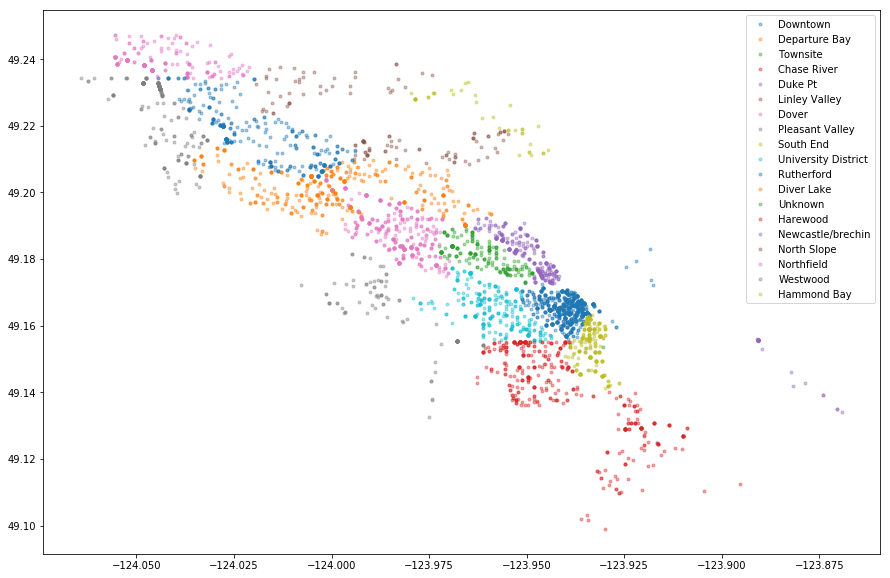

In [144]:
plt.close()
plt.figure(figsize=(15,10))
nDat = dict()
ctDat = dict()
ctdict = co.defaultdict(int)
for n in neighbourhoods:
    
    LAT_n = [float(crime['lat']) for crime in dat if crime['neighbourhood']==n]
    LONG_n = [float(crime['long']) for crime in dat if crime['neighbourhood']==n]
    nDat[n] = []
    
    for crime in dat:
        if crime['neighbourhood']==n:
            nDat[n].append(crime)
            ctdict[n]+=1
    ctDat[n] = ctdict      

    plt.plot(LONG_n,LAT_n,'o',markersize=3,alpha=0.4,label=n)
    ctdictS = sorted(list(ctdict.items()),key=itemgetter(1))

plt.legend()

In [145]:
ctDatS = sorted(list(ctdict.items()),key=itemgetter(1))[-1:0:-1]

In [187]:
# Locations with number of crimes
ctDatS

[('Downtown', 1050),
 ('Northfield', 392),
 ('Rutherford', 319),
 ('Harewood', 309),
 ('Diver Lake', 299),
 ('Newcastle/brechin', 298),
 ('South End', 286),
 ('University District', 283),
 ('Dover', 247),
 ('Pleasant Valley', 196),
 ('Townsite', 196),
 ('Departure Bay', 174),
 ('Chase River', 101),
 ('Westwood', 87),
 ('Linley Valley', 83),
 ('Hammond Bay', 39),
 ('North Slope', 33),
 ('Duke Pt', 29)]

In [147]:
crime_counter = co.defaultdict(int)
for crime in dat:
    crime_counter[crime['crimetype']] += 1
CL = crime_counter.items()
CLS = sorted(list(CL),key=itemgetter(1))

In [148]:
print("Top crimes",end='\n \n')
for crim,num in CLS[::-1]:
    print(crim+':',num)

Top crimes
 
Mischief: 1391
Theft from Motor Vehicle: 1277
Theft: 730
Shoplifting: 471
Break and Enter: 401
Theft of Motor Vehicle: 152


In [149]:
occurence_counter = co.defaultdict(int)
for crime in dat:
    occurence_counter[crime['occurrencetype']] += 1
OL = occurence_counter.items()
OLS = sorted(list(OL),key=itemgetter(1))
print("Top crimes",end='\n \n')
for crim,num in OLS[::-1]:
    print(crim+':',num)

Top crimes
 
Theft from Motor Vehicle Under $5000: 1265
Mischief Under $5000: 905
Theft Other Under $5000: 568
Mischief - Loss of Enjoyment of Property: 471
Shoplifting Under $5000: 470
Commercial Break and Enter: 185
Residential Break and Enter: 141
Theft Bicycle Under $5000: 133
Other Break and Enter: 73
Theft of Auto Under $5000: 44
Theft of Truck Under $5000: 22
Theft of Auto Over $5000: 22
Theft of Motorcycle Under $5000: 18
Take Auto Without Consent Under $5000: 13
Theft of Truck Over $5000: 12
Theft From Motor Vehicle Over $5000: 12
Theft From Mail: 12
Theft Other Over $5000: 10
Mischief Over $5000: 8
Mischief Caused by Act/Ommission: 7
Theft of Other Vehicle Under $5000: 7
Take Auto Without Consent Over $5000: 6
Theft Bicycle Over $5000: 6
Theft of Other Vehicle Over $5000: 4
Theft of Motorcycle Over $5000: 4
Seasonal Residence Break and Enter: 2
Theft Electric/Gas/Telephone Under $5000: 1
Shoplifting Over $5000: 1


In [150]:
for loc in nDat.keys():
    occurence_counter = co.defaultdict(int)
    for crime in nDat[loc]:
        occurence_counter[crime['occurrencetype']] += 1
    OL = occurence_counter.items()
    OLS = sorted(list(OL),key=itemgetter(1))
    print("Top crimes in "+loc,end='\n \n')
    for crim,num in OLS[::-1]:
        print(crim+':',num)
    print('-'*20,end='\n \n')

Top crimes in Downtown
 
Theft from Motor Vehicle Under $5000: 290
Mischief Under $5000: 216
Theft Other Under $5000: 131
Shoplifting Under $5000: 126
Mischief - Loss of Enjoyment of Property: 108
Commercial Break and Enter: 66
Residential Break and Enter: 31
Theft Bicycle Under $5000: 24
Other Break and Enter: 15
Theft of Auto Under $5000: 7
Take Auto Without Consent Under $5000: 5
Theft of Motorcycle Under $5000: 5
Mischief Caused by Act/Ommission: 4
Theft of Truck Under $5000: 4
Theft of Auto Over $5000: 4
Theft Other Over $5000: 3
Theft Bicycle Over $5000: 3
Theft of Other Vehicle Under $5000: 2
Theft From Motor Vehicle Over $5000: 2
Mischief Over $5000: 1
Theft Electric/Gas/Telephone Under $5000: 1
Theft of Truck Over $5000: 1
Theft From Mail: 1
--------------------
 
Top crimes in Departure Bay
 
Theft from Motor Vehicle Under $5000: 63
Mischief Under $5000: 41
Theft Other Under $5000: 17
Shoplifting Under $5000: 16
Mischief - Loss of Enjoyment of Property: 13
Theft Bicycle Under

In [151]:
def get_crime_type(crime):
    return crime['crimetype']+': '+crime['occurrencetype']

In [152]:
types = set()
for dat_i in dat:
    types.add(dat_i['crimetype']+': '+dat_i['occurrencetype'])

In [181]:
weekdays = ['Mon', 'Tue', 'Wed', "Th",'Fri','Sat',"Sun"]

In [184]:
type_day_dat = dict()
for typ in types:
    ctdi = co.defaultdict(int)
    for crime in dat:
        if get_crime_type(crime) == typ :
            d = crime['date'][0].split('/')
            crime_dt = dt.datetime(int(d[-1]),int(d[0]),int(d[1]))
            ctdi[weekdays[crime_dt.weekday()]] += 1
    ctdiS = sorted(list(ctdi.items()),key=itemgetter(1))[-1:-16:-1]
    if ctdiS[-1][1]>=6:
        type_day_dat[typ] = ctdiS      

In [185]:
type_day_dat

{'Shoplifting: Shoplifting Under $5000': [('Th', 82),
  ('Sun', 74),
  ('Fri', 73),
  ('Sat', 71),
  ('Mon', 60),
  ('Tue', 59),
  ('Wed', 51)],
 'Break and Enter: Residential Break and Enter': [('Mon', 26),
  ('Tue', 24),
  ('Th', 23),
  ('Wed', 20),
  ('Fri', 19),
  ('Sat', 18),
  ('Sun', 11)],
 'Theft from Motor Vehicle: Theft from Motor Vehicle Under $5000': [('Tue',
   211),
  ('Mon', 190),
  ('Th', 182),
  ('Wed', 179),
  ('Fri', 177),
  ('Sat', 173),
  ('Sun', 153)],
 'Mischief: Mischief Under $5000': [('Fri', 143),
  ('Mon', 139),
  ('Th', 137),
  ('Wed', 130),
  ('Sat', 128),
  ('Sun', 119),
  ('Tue', 109)],
 'Break and Enter: Other Break and Enter': [('Sun', 15),
  ('Sat', 14),
  ('Mon', 10),
  ('Tue', 9),
  ('Th', 9),
  ('Fri', 9),
  ('Wed', 7)],
 'Theft: Theft Other Under $5000': [('Wed', 95),
  ('Mon', 83),
  ('Fri', 82),
  ('Tue', 80),
  ('Sat', 79),
  ('Th', 77),
  ('Sun', 72)],
 'Break and Enter: Commercial Break and Enter': [('Sat', 33),
  ('Mon', 31),
  ('Wed', 31),
 